In [1]:
from networkx.generators.random_graphs import erdos_renyi_graph
import matplotlib.pyplot as plt
import networkx as nx 
import random

In [2]:
class ServiceProviderGraph(object):
    
    number_of_nodes = 0
    connection_probability = 0
    switched_nodes=[]
    Erdos_graph = erdos_renyi_graph
    Erdos_graph_dict = dict
    
    def __init__(self, nodes, probability):
        self.number_of_nodes = nodes 
        self.connection_probability = probability
    
    def ERGraph(self):
        """Creating a graph structure."""
        self.Erdos_graph = erdos_renyi_graph(self.number_of_nodes, self.connection_probability)
        nx.draw(self.Erdos_graph, with_labels=True)
        plt.show(self.Erdos_graph)
        self.Erdos_graph_dict = nx.to_dict_of_lists(self.Erdos_graph)
        return 

        
        
    def SwitchedNodes(self, switching_rate):
        """Creating the initially infected nodes."""
        number_of_switched_nodes = switching_rate * self.number_of_nodes
        while len(self.switched_nodes) < number_of_switched_nodes:
            n = random.randint(0, self.number_of_nodes)
            self.switched_nodes.append(n)
            self.switched_nodes = list(dict.fromkeys(self.switched_nodes))  
        return
    

    def SwitchingModel(self, node, threshold, positive_experiences, negative_experiences):
        """Evaluating the node's threshold against the proportion of negative experiences."""
        if node > self.number_of_nodes:
            print ("Node " + str(node) + " is not found in nodes.")    
        else:
            
            if node in self.switched_nodes:
                return ""
            else:
                current_position = 0

                if node in self.switched_nodes:
                    return ""
                else: 
                    experience_value = experiences[current_position % (len(experiences))]
            
                    if experience_value == 1:                  
                        positive_experiences+=1 
                    else:
                        negative_experiences+=1
            
                    lambda_node = negative_experiences/(positive_experiences+negative_experiences)
                    
                    if lambda_node >= threshold:
                        self.switched_nodes.append(node)
                        #print ("Threshold value is exceeded. Lambda(v) = " + str(lambda_node) + " and threshold(v) = " + str(threshold) + ". Node " + str(node) + " is assigned to switched nodes")
                    else:
                        ""#print ("Threshold value is not exceeded. Lambda(v) = " + str(lambda_node) + " and threshold(v) = " + str(threshold) +".")
                    
                    
                current_position+=1


# Execution

## Creating list of experiences
Note: Currently, same list is used for all nodes

In [9]:
experiences = [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]

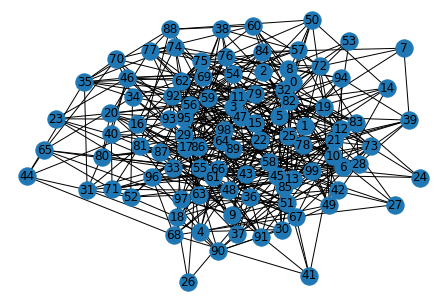

In [10]:
H = ServiceProviderGraph(100, 0.1)
H.ERGraph()
H.SwitchedNodes(0.05)

In [11]:
time = []
switched_nodes_at_time_step = []
remained_nodes_at_time_step = []

print ("(Before execution) Switched nodes: " + str(len(H.switched_nodes)))
for iteration in range (len(experiences)): 
    switched_nodes_at_time_step.append(len(H.switched_nodes))
    remained_nodes_at_time_step.append(H.number_of_nodes-len(H.switched_nodes))

    for x in range (H.number_of_nodes):
       H.SwitchingModel(x, random.randint(0, 10000)/10000, random.randint(0,5), random.randint(0,5))
    time.append(iteration)
    
print("(After execution) Switched nodes: " + str(len(H.switched_nodes)) + " and remained nodes: " + str(H.number_of_nodes-len(H.switched_nodes)))

(Before execution) Switched nodes: 5
(After execution) Switched nodes: 99 and remained nodes: 1


## Plotting

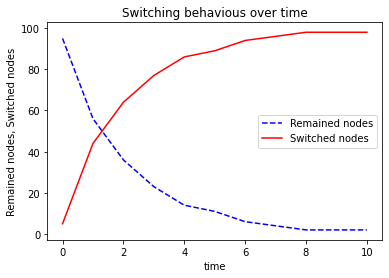

In [12]:
plt.plot(time, remained_nodes_at_time_step, '--', color="blue", label="Remained nodes")
plt.plot(time, switched_nodes_at_time_step, '-', color="red", label="Switched nodes")
plt.title("Switching behavious over time")
plt.xlabel("time")
plt.ylabel("Remained nodes, Switched nodes")
plt.legend()
plt.show()